In [27]:
import pandas as pd
from functools import partial
import multiprocessing as mp
from functools import partial

# df = pd.read_csv("about_us_second_round_with_additional_firms.csv", low_memory=False)
df = pd.read_csv("/Users/vijay/Documents/projects/research/takeda/miu-phrases/sp_2024/miu-website/company_website_second_round_with_additional_firms.csv", low_memory=False)

print("Opened CSV")

Opened CSV


In [28]:
# keywords = [
#     "made in america", "made in u.s.", "made in us", # made in usa and made in us overlap
#     "american made", "usa made", "u.s. made", "us made",
#     "buy american", "buy usa", "buy america",
#     "support america", "support usa", "support u.s.",
#     "patriot",
#     "choose american", "choose usa", "choose u.s.", "choose america",
#     "national pride",
#     "usa based", "america based", "american based", "us based", "u.s. based",
#     "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
#     "american worker", "american job",
#     "veteran owned", "veteran founded", "founded by veteran",
#     "crafted in america", "crafted in u.s.", "crafted in us", # removed "crafted in the usa" due to overlap with crafted in the US
#     "america heritage", "america tradition", "america value",
#     "icon of america", "icon of usa", "icon of u.s.",
#     "america manufactur", "u.s. manufactur", "us manufactur"
# ]


# keywords = [
#     "abroad",
#     "ahn sung ki",
#     "appreciating renminbi",
#     "asean rok",
#     "asian",
#     "bahk byong won",
#     "beijing",
#     "burmese",
#     "cambodia laos burma",
#     "carmaker chery",
#     "chaebol conglomerates",
#     "changfeng motors",
#     "china quarantined",
#     "china textile",
#     "chinese",
#     "communist party plenum",
#     "communist regime",
#     "cross strait",
#     "cyclical downturns",
#     "delegate li junhua",
#     "domestic",
#     "dumpling poisoning",
#     "european",
#     "fledging democracies",
#     "foreigners",
#     "gaeseong industrial complex",
#     "gao hucheng",
#     "garment exporters",
#     "geumgang resort",
#     "global",
#     "government",
#     "guoqi",
#     "hainan airlines",
#     "hakka culture",
#     "hanoi",
#     "hansol paper",
#     "hardline stalinist",
#     "hcm city vietnam",
#     "hermit kingdom",
#     "hite brewery",
#     "hongkong",
#     "indo sino",
#     "indonesian",
#     "inflates exporters",
#     "intentionally oversupplying neighboring",
#     "inter korean",
#     "international",
#     "iranian",
#     "japanese militarism",
#     "kyobo life insurance",
#     "landlocked laos",
#     "liberalising",
#     "mainland",
#     "malaysian",
#     "maritime territorial disputes",
#     "mercantilist policies",
#     "mncs",
#     "mofat",
#     "multinational corporations",
#     "myanmar",
#     "nepalese",
#     "newly industrialising economies",
#     "nk nukes",
#     "nkorean nuke test",
#     "nonmarket economies",
#     "north koreans",
#     "occupied manchuria",
#     "officially pacifist",
#     "overseas",
#     "peoples republic",
#     "poisoned dumplings",
#     "protectionist pressures",
#     "pyongyang",
#     "reminbi",
#     "resolute countermeasures",
#     "restarted psychological warfare",
#     "retaliated militarily",
#     "revolutionary guard ballistic missiles",
#     "singaporean",
#     "sino dprk",
#     "sino japanese",
#     "sk telekom",
#     "sohn kyung shik",
#     "south korea hyundai",
#     "speak fluent mandarin",
#     "taipei taiwanese",
#     "taishang",
#     "taiwanese chipmakers",
#     "tangun trading",
#     "thai",
#     "tiananmen dissident",
#     "tourism organization",
#     "tradeables sector",
#     "transnational corporations",
#     "undervalued renminbi",
#     "venetian macao casino resort",
#     "vietnamese shoemakers",
#     "vinomotor",
#     "wartime militarism",
#     "yuan denominated",
# ]

keywords = [
    "acas",
    "acftu",
    "act nlra",
    "aerospace speea",
    "afl cio",
    "aflcio",
    "afsme",
    "agreements",
    "airline mechanics fraternal",
    "amfa mechanics",
    "antidiscrimination laws",
    "antidiscrimination policies",
    "antilabor",
    "bargain collectively",
    "benefits",
    "capitalist exploitation",
    "carpenters laborers",
    "ccwu",
    "ccoo",
    "civil servants"
    "cleaners caterers",
    "co op miners",
    "collective bargaining",
    "conducting unannounced inspections",
    "confederation",
    "constitutional amendments guaranteeing",
    "constitutionally guaranteed",
    "constitutionally protected liberties",
    "contractors",
    "contractualization",
    "conciliation",
    "cotu",
    "cwa",
    "democratically aligned",
    "eliminates binding arbitration",
    "enterprise bargaining agreement",
    "featherbedding",
    "federally mediated negotiations",
    "fifth amendment takings",
    "fairness",
    "fiom",
    "flight attendants machinists",
    "fmpr",
    "forca sindical",
    "gagging clauses",
    "hardline cgt",
    "inland boatmen",
    "international longshoremen",
    "iww baristas",
    "minimum wage act",
    "mourn organize",
    "msea",
    "nactu",
    "naeci",
    "nflpa decertified",
    "nflpa dissolved",
    "nonmanagement employees",
    "nonrepresented",
    "nonuniformed employees",
    "nsgeu",
    "numsa",
    "nwa flight attendants",
    "ocsea",
    "opeiu local",
    "organized labor",
    "panhellenic seamen federation",
    "pensions",
    "picketing",
    "prevailing wage",
    "protections",
    "ratified concessionary",
    "redundancy payouts",
    "reopener clause",
    "reopeners",
    "sag aftra",
    "sagaftra",
    "salary rollbacks",
    "seifsa",
    "seiu",
    "sfwu",
    "sickouts",
    "solidarity",
    "staged wildcat strikes",
    "strikebreakers",
    "subcontracted",
    "tawusa",
    "teamsters",
    "tfws",
    "tppa",
    "tripartism",
    "unfair dismissal",
    "union",
    "unite",
    "unorganized",
    "unscrupulous gangmasters",
    "wage freezes",
    "workers",
    "warehousemen",
    "www.alliedpilots.org"
]

In [29]:
df.drop(df.columns[:14], axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('\.')]
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_52622/305825213.py:2: SyntaxWarning: invalid escape sequence '\.'
  df = df.loc[:, ~df.columns.str.contains('\.')]


,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,NaN,NaN,NaN,NaN,NaN,NaN,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,...,NaN,NaN,NaN,NaN,NaN,NaN,"\nWelcome to Regal Ware, Inc.\nA global leader...","\nWelcome to Regal Ware, Inc.\nA global leader...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nCustom Swim Parkas and Wholesale Fleece Jack...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.shape

(5189, 325)

In [31]:
columns = list(df.columns)

In [32]:
def count_keywords_in_cell(cell, keywords):
    return sum(1 if keyword.lower() in str(cell).lower() else 0 for keyword in keywords)

def calculate_total_counts(df, columns, keywords):
    total_counts_df = pd.DataFrame(index=df.index, columns=columns, dtype=int).fillna(0)
    
    for index, row in df.iterrows():
        previous_count = 0  # Initialize the previous count
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_count = count_keywords_in_cell(cell_value, keywords)
            
            # If the current count is zero and the previous count is greater than zero, use the previous count
            if current_count == 0 and previous_count > 0:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = previous_count
            else:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = current_count
                previous_count = current_count  # Update previous count
    
    return total_counts_df

In [33]:
total_counts_df = calculate_total_counts(df, columns, keywords)

In [34]:
total_counts_df

,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
document_counts = [0] * len(columns) # Initialize a list to hold the count of documents for each year.

for row in df.itertuples(index=False):# Iterate over each row in the DataFrame.
    previous_count = 0 # Initialize the previous count to 0 for the first iteration.

    for idx in reversed(range(len(columns))):    # Iterate over the columns in reverse order to update the document count.
        value = row[idx] # Access the value using the appropriate index for itertuples() output.
        
        # Check if the current cell has a document (non-NaN and not an empty string).
        if pd.isna(value) or isinstance(value, int):
            document_counts[idx] += previous_count # If there's a document, increment the count for the year and set the previous count to 1.
        else:
            document_counts[idx] += 1 # If there's no document, add the previous year's count to this year's count.
            previous_count = 1 # We have found a document so previous should never be 0



total_documents = sum(document_counts)
document_count_sum = total_documents
# Print the total number of documents.
print(total_documents)

878379


In [36]:
# Extract the count values for the term frequency IDF portion
term_count = {}

# def count_term_existence(keyword):
#     import pandas as pd
#     print("Processing keyword: ", keyword)
#     # Columns indicating years
#     columns = list(df.columns)
#     term_existence = [0] * len(columns)

#     for row in df.itertuples(index=True): # For each website
#         previous_value = 0 # Track the previous value
#         for column in range(len(columns) - 1, -1, -1): # Go from the earliest time to the latest time.
#             if pd.isna(row[column]) or type(row[column]) == int: # Is the value a number or showing a null value?
#                 term_existence[column] += previous_value # Add the most recent value
#             else:
#                 if keyword in row[column].lower(): # is the keyword in the lowercased version of the text?
#                     term_existence[column] += 1 # Yes? then add 1 to the value for this year
#                     previous_value = 1 # Yes? Set the previous value to 1
#                 else:
#                     term_existence[column] += previous_value # Keyword isn't there? If it was there in last year(s), include it this year. 

#     return {keyword: sum(term_existence)} # Sum the value over all of the different years


def count_term_existence(keyword):
    print(f"Processing keyword: {keyword}")
    term_existence = [0] * len(columns)
    
    for index, row in df.iterrows():
        previous_total_count = 0  # Initialize the total count for all keywords in the previous cell
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_total_count = total_counts_df.at[index, col]

            if current_total_count == 0 and previous_total_count > 0:
                # If total count drops to 0 but was higher before, carry over the previous value
                term_existence[len(columns) - 1 - col_idx] += 1
            elif pd.isna(cell_value) or isinstance(cell_value, int):
                term_existence[len(columns) - 1 - col_idx] += 0
            else:
                if keyword in cell_value.lower():
                    term_existence[len(columns) - 1 - col_idx] += 1
                else:
                    term_existence[len(columns) - 1 - col_idx] += 0

            if current_total_count == 0 and previous_total_count > 0:
                previous_total_count = previous_total_count
            else:
                previous_total_count = current_total_count  # Update the total count for the next iteration

    return {keyword: sum(term_existence)}


In [ ]:
results = [count_term_existence(keyword) for keyword in keywords]

term_count = {}
for result in results:
    term_count.update(result)

print(term_count)

Processing keyword: acas
Processing keyword: acftu
Processing keyword: act nlra
Processing keyword: aerospace speea
Processing keyword: afl cio
Processing keyword: aflcio
Processing keyword: afsme
Processing keyword: agreements
Processing keyword: airline mechanics fraternal
Processing keyword: amfa mechanics
Processing keyword: antidiscrimination laws
Processing keyword: antidiscrimination policies
Processing keyword: antilabor
Processing keyword: bargain collectively
Processing keyword: benefits
Processing keyword: capitalist exploitation


In [ ]:
import math

def generate_final_value_by_year(data):
    keyword, term_existence = data

    print("Processing keyword: ", keyword)
    adjusted_keyword_count = [0] * len(columns)

    if term_existence == 0: # Skip over if this term wasn't counted in any of the years
        return {keyword: adjusted_keyword_count}
    
    for row in df.itertuples(index=True):
        previous_value = 0
        for column in range(len(columns) - 1, -1, -1): # Iterate from least recent to most recent
            if pd.isna(row[column]) or type(row[column]) == int: # Does the current value here not exist?
                adjusted_keyword_count[column] += previous_value # Add in the previous value instead
            else:

                keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document (for not using TF-IDF)
                value = keyword_count # No changes to the value here! (for not using TF-IDF)

                if keyword_count > 0 or value > previous_value: # Is the value greater? Does the keyword count exist
                    adjusted_keyword_count[column] += value # Increment by the value we just got
                    previous_value = value # Set previous value
                else: 
                    adjusted_keyword_count[column] += previous_value # Just use the previous value

    return {keyword: adjusted_keyword_count}

In [ ]:
results = [generate_final_value_by_year((keyword, term_count[keyword])) for keyword in keywords]

tf_idf_total = {}
for result in results:
    tf_idf_total.update(result)

print(tf_idf_total)

Processing keyword:  abroad
Processing keyword:  ahn sung ki
Processing keyword:  appreciating renminbi
Processing keyword:  asean rok
Processing keyword:  asian
Processing keyword:  bahk byong won
Processing keyword:  beijing
Processing keyword:  burmese
Processing keyword:  cambodia laos burma
Processing keyword:  carmaker chery
Processing keyword:  chaebol conglomerates
Processing keyword:  changfeng motors
Processing keyword:  china quarantined
Processing keyword:  china textile
Processing keyword:  chinese
Processing keyword:  communist party plenum
Processing keyword:  communist regime
Processing keyword:  cross strait
Processing keyword:  cyclical downturns
Processing keyword:  delegate li junhua
Processing keyword:  domestic
Processing keyword:  dumpling poisoning
Processing keyword:  european
Processing keyword:  fledging democracies
Processing keyword:  foreigners
Processing keyword:  gaeseong industrial complex
Processing keyword:  gao hucheng
Processing keyword:  garment ex

In [ ]:
print(tf_idf_total[keywords[0]])

[77, 77, 77, 76, 76, 76, 76, 75, 75, 74, 74, 74, 74, 74, 73, 73, 73, 73, 70, 70, 70, 70, 69, 69, 69, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 65, 65, 65, 66, 66, 66, 66, 62, 61, 61, 61, 61, 61, 61, 59, 58, 58, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 50, 50, 50, 50, 50, 49, 49, 47, 45, 45, 46, 45, 43, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 39, 39, 39, 39, 39, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 33, 33, 31, 31, 31, 31, 30, 30, 28, 28, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 26, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [ ]:
year_sums = [0] * len(columns)
for keyword in keywords: # Going through all of the keywords
    if type(tf_idf_total[keyword]) == int: # This is a redundant invalid check
        continue
    for column in range(len(columns)): # Go through all of the years
        year_sums[column] += tf_idf_total[keyword][column] # Adding up all the sums per year 
    
for column in range(len(columns)): 
    # print(column)
    # print(document_count[column])   
    # print(year_sums[column], document_count[column])

    try:
        year_sums[column] /= document_counts[column]
    except ZeroDivisionError:
        year_sums[column] /= 1
print(year_sums[:10])

[1.9668484187568156, 1.968565815324165, 1.946701616426387, 1.9420384951881016, 1.9295713035870516, 1.9242391066345523, 1.9136154352115764, 1.9018660812294181, 1.903964757709251, 1.885997794928335]


In [ ]:
print(df.columns.tolist())

['2023-10', '2023-09', '2023-08', '2023-07', '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09', '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04'

325 [Timestamp('2023-10-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


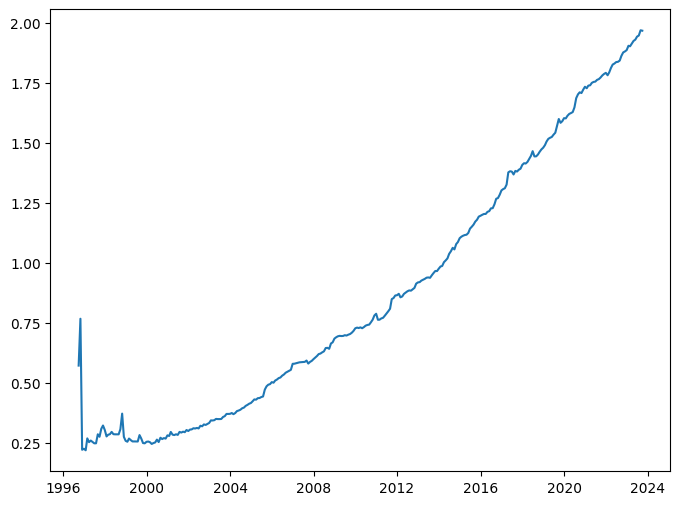

In [ ]:
columns = pd.to_datetime(list(df.columns)) # Going back to the original dataframe and getting the columns from there
columns = list(columns) # Turning it from Pandas format to list format

print(len(columns), columns[:3])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(columns, list(year_sums)) # Plotting it!

In [ ]:
company_website_year_sums = year_sums

In [ ]:
company_website_year_sums_columns = columns

In [ ]:
about_us_year_sums = year_sums

In [ ]:
about_us_year_sums_columns = columns

In [ ]:
about_us_year_sums

[1.9668484187568156,
 1.968565815324165,
 1.946701616426387,
 1.9420384951881016,
 1.9295713035870516,
 1.9242391066345523,
 1.9136154352115764,
 1.9018660812294181,
 1.903964757709251,
 1.885997794928335,
 1.8803267829542945,
 1.8763000663863687,
 1.8620765995129511,
 1.8423383525243577,
 1.8371010638297873,
 1.8360328378078545,
 1.8300377693845813,
 1.825700311249444,
 1.8116651825467498,
 1.7928651059085843,
 1.7812011609734315,
 1.7911547911547911,
 1.7866249161261463,
 1.7804713804713805,
 1.7718271827182719,
 1.7650507328072154,
 1.7619801084990958,
 1.7546913859371467,
 1.7533967391304348,
 1.749432591920109,
 1.7391403229474642,
 1.73808981080465,
 1.7270233196159122,
 1.7332875457875458,
 1.7210634884253955,
 1.7070428997476486,
 1.7101014760147601,
 1.7016894237445035,
 1.6859004187994415,
 1.647197362223269,
 1.6278026905829597,
 1.6235795454545454,
 1.6200997861724875,
 1.6123809523809525,
 1.6015252621544327,
 1.6023866348448688,
 1.5896395321079015,
 1.5830143540669857,
 

In [ ]:
company_website_year_sums

[1.9668484187568156,
 1.968565815324165,
 1.946701616426387,
 1.9420384951881016,
 1.9295713035870516,
 1.9242391066345523,
 1.9136154352115764,
 1.9018660812294181,
 1.903964757709251,
 1.885997794928335,
 1.8803267829542945,
 1.8763000663863687,
 1.8620765995129511,
 1.8423383525243577,
 1.8371010638297873,
 1.8360328378078545,
 1.8300377693845813,
 1.825700311249444,
 1.8116651825467498,
 1.7928651059085843,
 1.7812011609734315,
 1.7911547911547911,
 1.7866249161261463,
 1.7804713804713805,
 1.7718271827182719,
 1.7650507328072154,
 1.7619801084990958,
 1.7546913859371467,
 1.7533967391304348,
 1.749432591920109,
 1.7391403229474642,
 1.73808981080465,
 1.7270233196159122,
 1.7332875457875458,
 1.7210634884253955,
 1.7070428997476486,
 1.7101014760147601,
 1.7016894237445035,
 1.6859004187994415,
 1.647197362223269,
 1.6278026905829597,
 1.6235795454545454,
 1.6200997861724875,
 1.6123809523809525,
 1.6015252621544327,
 1.6023866348448688,
 1.5896395321079015,
 1.5830143540669857,
 

In [ ]:
# Create a DataFrame
df_final = pd.DataFrame({
    'year_month_day': about_us_year_sums_columns,
    'company_website_year_sums': company_website_year_sums,
    'about_us_year_sums': about_us_year_sums
})

# Add the combined column
df_final['combined'] = df_final['company_website_year_sums'] + df_final['about_us_year_sums']

print(df_final)

    year_month_day  company_website_year_sums  about_us_year_sums  combined
0       2023-10-01                   1.966848            1.966848  3.933697
1       2023-09-01                   1.968566            1.968566  3.937132
2       2023-08-01                   1.946702            1.946702  3.893403
3       2023-07-01                   1.942038            1.942038  3.884077
4       2023-06-01                   1.929571            1.929571  3.859143
..             ...                        ...                 ...       ...
320     1997-02-01                   0.218623            0.218623  0.437247
321     1997-01-01                   0.225000            0.225000  0.450000
322     1996-12-01                   0.220779            0.220779  0.441558
323     1996-11-01                   0.766667            0.766667  1.533333
324     1996-10-01                   0.571429            0.571429  1.142857

[325 rows x 4 columns]


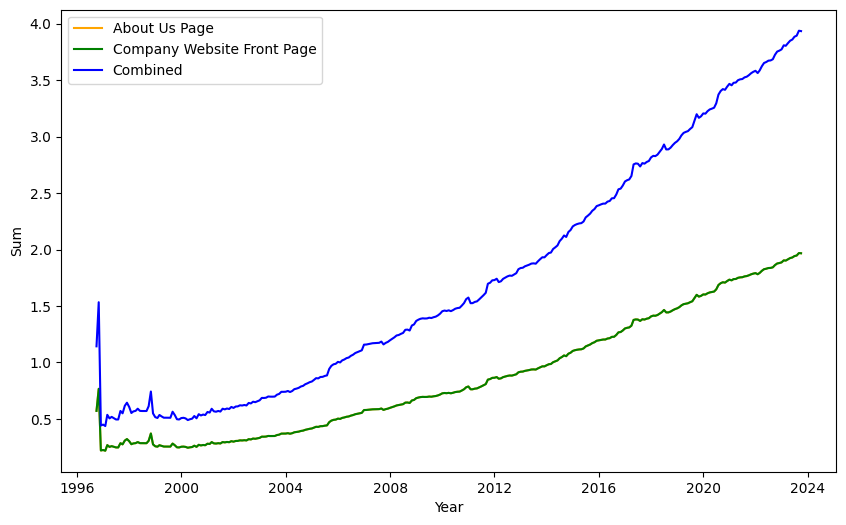

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(df_final['year_month_day'], df_final['about_us_year_sums'], label='About Us Page', color='orange')
plt.plot(df_final['year_month_day'], df_final['company_website_year_sums'], label='Company Website Front Page', color='green')
plt.plot(df_final['year_month_day'], df_final['combined'], label='Combined', color='blue')

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Sum')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
df_final.to_csv("C:\\Users\\theal\\research\\plot_recreation\\tf_idf_values.csv", index=False)